In [ ]:
# imports

from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.graph import StateGraph
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph.message import add_messages
from pydantic import BaseModel

load_dotenv(override=True)

True

In [2]:
# Step 1: Define the State object
class State(BaseModel):
    messages: Annotated[list, add_messages]

# Step 2: Start the Graph Builder with this State class
graph_builder = StateGraph(State)


# Step 3: Create a Node

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
)

def chatbot_node(old_state: State) -> State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages=[response])
    return new_state

graph_builder.add_node("chatbot", chatbot_node)

# Step 4: Create Edges
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

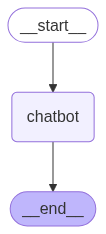

In [3]:
# Step 5: Compile the Graph
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
def chat(user_input: str, history):
    initial_state = State(messages=[{"role": "user", "content": user_input}])
    result = graph.invoke(initial_state)
    print(result)
    return result['messages'][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='3a371802-0fe0-44d8-b7c6-7a5d85c5dd46'), AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--b5233fdd-2d5a-4c3c-9074-5ff00321cf09-0', usage_metadata={'input_tokens': 2, 'output_tokens': 10, 'total_tokens': 39, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 27}})]}
{'messages': [HumanMessage(content='I am learning state machines becasue I am learning LangGraph, can you help me it.', additional_kwargs={}, response_metadata={}, id='58e92d1c-be54-4bad-a7ec-def816f55f2b'), AIMessage(content='That\'s an excellent connection to make! You\'re absolutely right: **LangGraph is fundamentally a framework for building state machines.** Understanding state machines will give you a powe